In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading data

In [25]:
train=pd.read_csv('train.csv')
train.head()
train.info()
train[train.isnull().any(axis=1)]
print(len(train))

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


,id,date,store_nbr,family,sales,onpromotion


3000888


In [33]:
x_test=pd.read_csv('test.csv')
x_test.head()
x_test.info()
print(len(x_test))

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
28512


In [23]:
holidays=pd.read_csv('holidays_events.csv')
holidays.head()
print(len(holidays))

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


350


In [26]:
stores=pd.read_csv('stores.csv')
stores.head()
stores.info()
print(len(stores))

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
54


In [27]:
transactions=pd.read_csv('transactions.csv')
transactions.head()
transactions.info()
print(len(transactions))

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
83488


# X,Y split

In [30]:
x_train,y_train=train.drop('sales',axis=1),train['sales']
x_train.head()

,id,date,store_nbr,family,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0
1,1,2013-01-01,1,BABY CARE,0
2,2,2013-01-01,1,BEAUTY,0
3,3,2013-01-01,1,BEVERAGES,0
4,4,2013-01-01,1,BOOKS,0


# Some preprocessing

In [61]:
# set date as index
train['date']=pd.to_datetime(train['date'])
train=train.set_index('date')
train

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0
2013-01-01,1,1,BABY CARE,0.000,0
2013-01-01,2,1,BEAUTY,0.000,0
2013-01-01,3,1,BEVERAGES,0.000,0
2013-01-01,4,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


# Visualisation

<Axes: xlabel='date', ylabel='sales'>

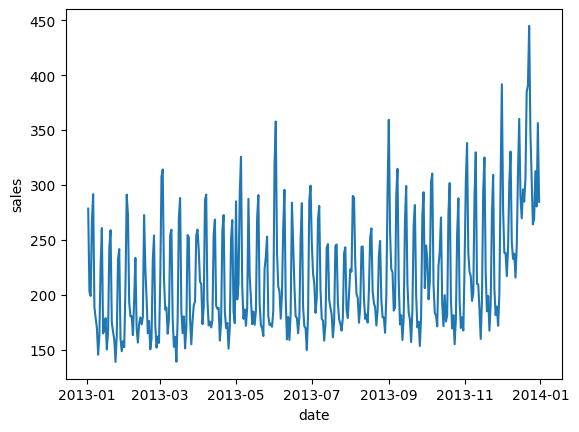

In [104]:
sns.lineplot(train.query('2013<date<2014'),x='date',y='sales',errorbar=None)

In [103]:
train.query('2013.1<date<2014.2')

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-02,1782,1,AUTOMOTIVE,2.000,0
2013-01-02,1783,1,BABY CARE,0.000,0
2013-01-02,1784,1,BEAUTY,2.000,0
2013-01-02,1785,1,BEVERAGES,1091.000,0
2013-01-02,1786,1,BOOKS,0.000,0
...,...,...,...,...,...
2014-01-31,703885,9,POULTRY,471.430,0
2014-01-31,703886,9,PREPARED FOODS,76.000,0
2014-01-31,703887,9,PRODUCE,1115.248,0


<Axes: xlabel='date', ylabel='sales'>

,sales
date,
2013-01-02,2.0
2013-01-02,0.0
2013-01-02,2.0


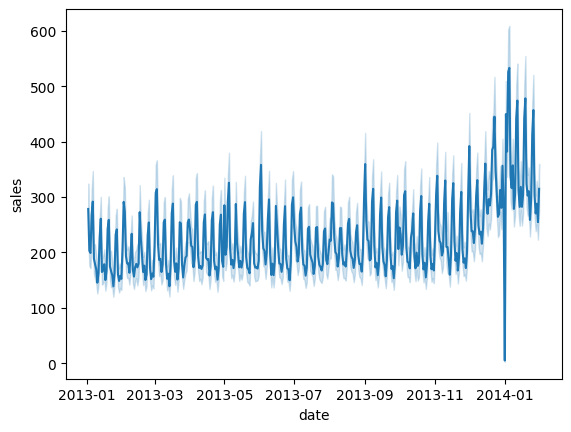

In [107]:
group_month=train.query('2013.1<date<2014.2')[['sales']]
sns.lineplot(group_month,x='date',y='sales')
group_month.head(3)

In [90]:
k=train.groupby([pd.Grouper(freq='ME'),'onpromotion'])[['sales']].mean()

<Axes: xlabel='date', ylabel='sales'>

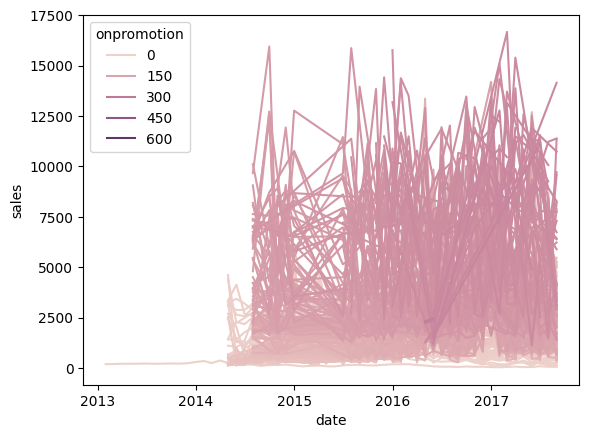

In [91]:
sns.lineplot(k,x='date',y='sales',hue='onpromotion')